- Define a population probability distribution by combining multiple pyhon's continuous distribution functions.
    - Show its theoretical average.

- Generate a sample set with a sample size of your choice.

- Calculate sample average.

- Repeat generating resampling sets and calculate their sample average.

- Caclulate the average of averages of the resampled sets.

- Compare the average of averages and the original sample set's average with the theoretical average.

- Repeat the above procedure multiple times.
- Make a plot that describes the results readily understandable.

作戦：
- 正規分布と指数分布を組み合わせて母集団(サンプル数たくさん)を作成する（カーネル密度推定なるものを作成する）
- 0.2・0.8ずつにして、設定した平均値を重み付けする
- サンプルサイズは200にする
- リサンプリングを何度かして平均を求める
<br>
<br>
- それらを何度か(数百回)行う


In [1]:
from sklearn.neighbors import KernelDensity
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1234)
x = np.random.normal(50, 10, 2000)# 平均 50, 標準偏差 10 の正規乱数を1,000件生成
y = np.random.exponential(1./0.1,size=8000) + 65 # 平均10の指数分布
targetpopulation = np.r_[x,y]#合計一万サンプル


(array([1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 8.000e+00, 1.600e+01,
        3.600e+01, 4.700e+01, 6.900e+01, 1.130e+02, 1.770e+02, 1.950e+02,
        2.430e+02, 2.300e+02, 2.420e+02, 1.940e+02, 1.450e+02, 9.400e+01,
        1.171e+03, 1.752e+03, 1.362e+03, 9.930e+02, 7.610e+02, 5.430e+02,
        4.090e+02, 2.860e+02, 2.110e+02, 2.020e+02, 1.190e+02, 9.500e+01,
        8.000e+01, 5.900e+01, 3.800e+01, 2.800e+01, 2.500e+01, 1.200e+01,
        8.000e+00, 6.000e+00, 9.000e+00, 5.000e+00, 2.000e+00, 2.000e+00,
        4.000e+00, 4.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 2.000e+00]),
 array([ 11.19101589,  14.10040153,  17.00978717,  19.91917281,
         22.82855846,  25.7379441 ,  28.64732974,  31.55671538,
         34.46610103,  37.37548667,  40.28487231,  43.19425795,
         46.1036436 ,  49.01302924,  51.92241488,  54.83180052,
         57.74118617,  60.65057181,  63.55995745,  66.46934309,
         69.37872874,  72.28811438,  75.19750002,  78.10

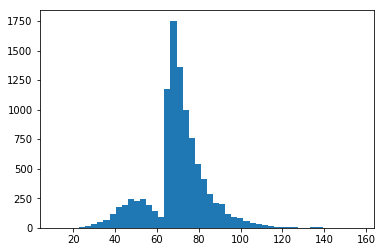

In [2]:
plt.hist(targetpopulation,bins=50)

In [3]:
# 平均の計算
print(50*0.2+(65+10)*0.8)

70.0


In [4]:
# 200/10000のサンプルIDを適当に重複ありで選択
sampleID = ([np.random.randint(1,10001) for i in range(200)])
print(sampleID)

[7065, 9701, 3862, 5955, 8146, 248, 8289, 8339, 2532, 8392, 2148, 1714, 2197, 203, 7000, 697, 2686, 9977, 2463, 2792, 1100, 7479, 5429, 4825, 9066, 1116, 2974, 3002, 6267, 1712, 6501, 3670, 1626, 6130, 5399, 732, 6039, 2041, 5855, 7021, 1786, 2941, 693, 2523, 2507, 696, 9949, 449, 8565, 8603, 3446, 6324, 6872, 9993, 7265, 752, 1957, 8410, 8673, 4571, 88, 9139, 9522, 5109, 5614, 9807, 8542, 5364, 121, 8067, 2271, 6175, 88, 2174, 6808, 1102, 8721, 4877, 6032, 8024, 9089, 9526, 7200, 67, 9458, 1419, 9710, 2404, 6395, 6232, 6190, 9988, 8285, 9446, 6325, 8467, 627, 3084, 2475, 8521, 9573, 3833, 3776, 3897, 3269, 6685, 5242, 6744, 8039, 5048, 6557, 3036, 4785, 2292, 1132, 6433, 7342, 4890, 9583, 6890, 8258, 5949, 6770, 6767, 3157, 9031, 2527, 3817, 9759, 3273, 9009, 6889, 1854, 728, 9263, 7446, 9899, 2101, 3304, 5185, 3612, 4455, 8763, 6082, 3273, 7279, 6040, 9212, 4969, 3727, 3803, 8165, 6397, 2227, 3672, 3422, 4332, 4175, 3332, 4941, 4339, 4607, 7303, 1705, 6080, 2822, 7530, 2841, 6741, 90

In [5]:
# 200/10000のサンプルIDを適当に重複ありで選択
sampleID = ([np.random.randint(1,10001,200)])
print(sampleID)

[array([2065, 2631, 7785, 4162, 1787, 5841, 2975, 3103, 1727, 3549, 9218,
       9172, 5864, 6631, 4327, 6672, 3427, 9086, 4816, 1265, 3216,  831,
       6293,  269, 3521, 1018, 4771, 9351,  273, 8894, 9233, 7227, 5103,
       7644, 1262, 7854, 5250, 7640, 8731, 6129, 8718, 6022,  549, 2691,
       9976, 1066,  781, 9222, 6337, 4268, 8006, 7484, 5866, 8377,    4,
         75, 2716, 6878, 2821,  220, 4066, 8002, 2458, 4933,  348, 4138,
       6232, 3950, 1977, 8969, 3555, 8526, 8358, 5510, 3124, 1400, 4611,
       7907, 8047, 1936, 9599, 2912, 5171, 7058, 3470, 5080, 8571, 9673,
         85, 1887, 4431, 3843, 4027, 5512, 6687, 3759, 8052, 6895, 3506,
       5424, 4298, 9348, 5362, 9926, 4561, 3418,  444, 5005, 4488, 6106,
       3740, 2069, 7919, 6094, 1960, 7631, 6010, 1425, 1511, 6956, 5835,
       4336, 4804, 1494, 2387, 3612, 2304, 2321,  398, 5537, 6744, 7748,
       6197, 9489, 3690, 6818, 1283, 4196, 7258, 1797, 6038, 4849, 1860,
       7832, 2929, 7097, 3120, 6857, 4298, 1290, 5

In [6]:
targetpopulation[sampleID]

array([ 83.60832589,  79.71049309,  67.65344638,  81.32876094,
        34.44668263,  73.04534729,  80.2885241 ,  72.26402337,
        53.7386146 ,  68.81111061,  71.36510042,  67.6187359 ,
        76.60411484,  67.00302607,  66.7983236 ,  71.85403028,
        65.74447902,  71.03578108,  83.92163862,  58.19101941,
        71.40008917,  49.24632102,  66.37641556,  53.87674456,
        67.67810271,  36.21718314,  78.57065489, 101.47455283,
        42.77337806,  71.48033769,  66.4222612 ,  76.07938083,
        65.07002958,  66.64405212,  49.2124074 ,  66.85465309,
        78.2877535 ,  66.73126396,  79.42021781,  82.06798773,
        75.56616218,  70.13505387,  45.10977942,  66.80001478,
        66.0344192 ,  50.87832899,  47.54639503,  80.94555724,
        79.01350499,  75.03260421,  78.34974831,  66.11817911,
        72.13382635,  90.74155175,  42.79411267,  70.07842951,
        70.27986771,  81.618223  ,  67.46032219,  47.23353873,
        68.29386611,  68.81130266,  69.20813128,  77.18

In [7]:
targetpopulation[sampleID].mean()


69.58096505793647

これを1000回回して、その平均(というか、rのsummary()のようなもの)を求める<br>

---

- ここからしばらくループにひっかかっています

In [8]:
total=[]
for j in range(1,1001):
    sampleID[j] = ([np.random.randint(1,10001) for i in range(200)])
    total.append(j) = targetpopulation[sampleID].mean()


SyntaxError: can't assign to function call (<ipython-input-8-e00b179f0aa7>, line 4)

In [11]:
total = []
total.append(1)
total

[1]

In [9]:
sampleID = ([np.random.randint(1,10001) for i in range(200)])
sampleID = ([np.random.randint(1,10001,200)])

In [10]:
targetpopulation[sampleID].mean()

69.88218986610964

In [37]:
total_1=[]
g = targetpopulation[sampleID].mean()
total_1.append(g)
total_1

/Users/daisuketakada/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


[68.72316003079699]

In [46]:
total_0=[]

sampleID = ([np.random.randint(1,10001) for i in range(200)])
total_0.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(1,10001) for i in range(200)])
total_0.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(1,10001) for i in range(200)])
total_0.append(targetpopulation[sampleID].mean())

total_0

[70.40624603638109, 71.21649682956615, 68.79553292125452]

In [47]:
total_0=[]

sampleID = ([np.random.randint(1,10001,200)])
total_0.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(1,10001,200)])
total_0.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(1,10001,200)])
total_0.append(targetpopulation[sampleID].mean())

total_0


/Users/daisuketakada/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.
/Users/daisuketakada/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys
/Users/daisuketakada/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this

[69.63170545847717, 69.6384923738812, 69.10310109569222]

だいたい７０くらいにはなりそう。

In [23]:
total=[]
for j in range(1,1000):
    sampleID_j = ([np.random.randint(1,10001,200)])
    total.append(targetpopulation[sampleID_j].mean())


/Users/daisuketakada/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


IndexError: index 10000 is out of bounds for axis 1 with size 10000

In [22]:
np.random.randint(0,5,50)

array([0, 1, 2, 2, 3, 4, 2, 3, 2, 4, 4, 0, 1, 2, 0, 1, 3, 1, 3, 2, 2, 2,
       2, 2, 0, 3, 3, 0, 4, 3, 4, 1, 0, 3, 4, 0, 2, 3, 1, 2, 1, 1, 2, 3,
       2, 4, 1, 1, 0, 4])

In [38]:
sampleID = ([np.random.randint(1,10001,200)])
total.append(targetpopulation[sampleID].mean())



/Users/daisuketakada/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  


In [44]:
total=[]
for j in range(1,1000):
    sampleID_j = ([np.random.randint(1,10001,200)])
    total.append(targetpopulation[sampleID_j].mean(j))
    else:
        print(total)



SyntaxError: invalid syntax (<ipython-input-44-e733b651ef96>, line 5)

繰り返しができない。。。。

In [48]:
total=[]
for j in range(1,1000):
    sampleID = ([np.random.randint(1,10001,200)])
    total.append(targetpopulation[sampleID].mean())


/Users/daisuketakada/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.


IndexError: index 10000 is out of bounds for axis 1 with size 10000

やはりできない。ループができないので、100回に減らして力技

---


In [52]:
total_2=[]

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

sampleID = ([np.random.randint(0,10000,200)])
total_2.append(targetpopulation[sampleID].mean())

total_2

/Users/daisuketakada/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  after removing the cwd from sys.path.
/Users/daisuketakada/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  import sys
/Users/daisuketakada/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this

[69.54752525703925,
 72.8504473368533,
 70.59995613101216,
 70.07566041872633,
 71.45414296043889,
 69.22677969468803,
 71.29109946465141,
 69.11632820120289,
 70.37743728016359,
 70.68188396766027,
 69.61022502922333,
 69.82547228683126,
 68.23571282083057,
 69.8149864334048,
 69.6583495343208,
 70.01869709342198,
 69.46752847655267,
 70.9527058075144,
 70.27067103998058,
 70.91458711791121,
 69.49937011094482,
 70.64156744573434,
 69.35589966301019,
 70.38563844955381,
 69.8257258496988,
 71.98365090846306,
 69.87985345533458,
 70.26992931928714,
 70.25884285063248,
 70.3084298317944,
 69.29020646797886,
 67.28141795516785,
 69.61415022873676,
 69.4886787954799,
 72.17034069854073,
 69.81277776689174,
 69.19403485740459,
 70.48352685286781,
 71.37200049211042,
 70.31834815179464,
 70.28657346036627,
 71.06339667833291,
 69.18936163887962,
 71.13813444192114,
 70.57323537671367,
 71.29150644667136,
 69.50209333338695,
 70.73359287409491,
 70.59220932694691,
 68.3764446664833,
 68.8061

In [53]:
len(total_2)

100

In [55]:
np.mean(total_2)

70.17580884374196

(array([ 2.,  2.,  4., 17., 21., 24., 17.,  7.,  3.,  3.]),
 array([67.28141796, 67.83832089, 68.39522383, 68.95212677, 69.50902971,
        70.06593265, 70.62283558, 71.17973852, 71.73664146, 72.2935444 ,
        72.85044734]),
 <a list of 10 Patch objects>)

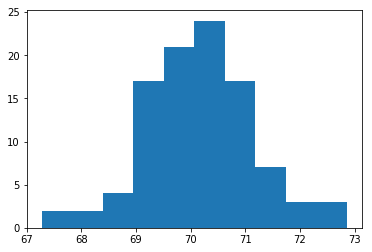

In [59]:
plt.hist(total_2)

これでよしとした。